In [14]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [15]:
my_data=pd.read_csv("cell_samples.csv")
my_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


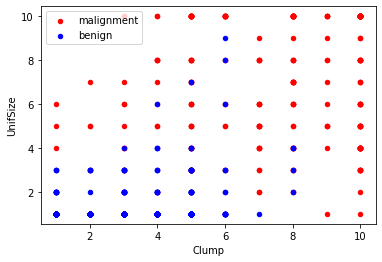

In [16]:
ax=my_data[my_data['Class']==4].plot(kind='scatter',x='Clump',y='UnifSize',color="red",label="malignment");
my_data[my_data['Class']==2].plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label="benign",ax=ax);
plt.show()

In [17]:
my_data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [18]:
my_data=my_data[pd.to_numeric(my_data['BareNuc'],errors='coerce').notnull()]
my_data['BareNuc']=my_data['BareNuc'].astype('int64')
x=my_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y=my_data[['Class']].values
y

<ipython-input-18-4de6c2c12591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['BareNuc']=my_data['BareNuc'].astype('int64')


array([[2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
    

NameError: name 'clear' is not defined

In [20]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)


In [24]:
from sklearn import svm
obj=svm.SVC(kernel='rbf')
obj.fit(x_train,y_train)

c:\users\kart b\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [31]:
yhat=obj.predict(x_test)
yhat.shape

(137,)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [36]:
a=classification_report(y_test,yhat)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


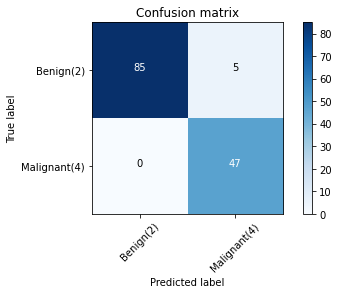

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [42]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

In [59]:
obj=svm.SVC(kernel='linear')
obj.fit(x_test,y_test)
b=classification_report(y_test,obj.predict(x_test))

c:\users\kart b\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [60]:
b

'              precision    recall  f1-score   support\n\n           2       1.00      1.00      1.00        90\n           4       1.00      1.00      1.00        47\n\n    accuracy                           1.00       137\n   macro avg       1.00      1.00      1.00       137\nweighted avg       1.00      1.00      1.00       137\n'

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test,obj.predict(x_test),average='weighted')

1.0

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,obj.predict(x_test),pos_label=2)

1.0